# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "RF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'RF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_RF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.613  1  1.157 0.284 0.006   
                             age        0.099  1  0.187 0.666 0.001   
                             Kiel       1.870  1  3.526 0.062 0.018   
                             Magdeburg  3.990  1  7.523 0.007 0.038   
                             Sweden     6.174  1 11.640 0.001 0.057   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.612  1  0.623 0.431 0.003   
                             age        2.031  1  2.066 0.152 0.011   
                             Kiel       0.086  1  0.088 0.768 0.000   
                             Magdeburg  1.941  1  1.975 0.162 0.010   
                             Sweden    17.261  1 17.558 0.000 0.084   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.547  0.446    False  
                             age               0.177  0.782    False  
                             Kiel              1.208  0.144    False  
                             Magdeburg         2.176  0.024     True  
                             Sweden            3.103  0.004     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.366  0.590    False  
                             age               0.817  0.284    False  
                             Kiel              0.115  0.856    False  
                             Magdeburg         0.792  0.296    False  
                             Sweden            4.371  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      RF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.942  1  7.054 0.009 0.036   
                             age        0.001  1  0.011 0.916 0.000   
                             Kiel       0.208  1  1.556 0.214 0.008   
                             Magdeburg  0.432  1  3.234 0.074 0.017   
                             Sweden     1.594  1 11.936 0.001 0.059   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.234  1  2.636 0.106 0.014   
                             age        0.675  1  1.442 0.231 0.007   
                             Kiel       2.177  1  4.650 0.032 0.024   
                             Magdeburg  2.196  1  4.690 0.032 0.024   
                             Sweden    13.945  1 29.787 0.000 0.135   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.067  0.025     True  
                             age               0.038  0.946    False  
                             Kiel              0.670  0.341    False  
                             Magdeburg         1.132  0.146    False  
                             Sweden            3.169  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.974  0.196    False  
                             age               0.636  0.361    False  
                             Kiel              1.491  0.075    False  
                             Magdeburg         1.501  0.073    False  
                             Sweden            6.828  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.284         0.547  0.446    False   
                             age       0.666         0.177  0.782    False   
                             Kiel      0.062         1.208  0.144    False   
                             Magdeburg 0.007         2.176  0.024     True   
                             Sweden    0.001         3.103  0.004     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.431         0.366  0.590    False   
                             age       0.152         0.817  0.284    False   
                             Kiel      0.768         0.115  0.856    False   
                             Magdeburg 0.162         0.792  0.296    False   
                             Sweden    0.000         4.371  0.000     True   

model                                     RF                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.009         2.067  0.025     True  
                             age       0.916         0.038  0.946    False  
                             Kiel      0.214         0.670  0.341    False  
                             Magdeburg 0.074         1.132  0.146    False  
                             Sweden    0.001         3.169  0.003     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.106         0.974  0.196    False  
                             age       0.231         0.636  0.361    False  
                             Kiel      0.032         1.491  0.075    False  
                             Magdeburg 0.032         1.501  0.073    False  
                             Sweden    0.000         6.828  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'RF': 'RF'}

## Describe scores

In [10]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.475     0.337     0.233         3.094     0.291
std       0.302         5.303     0.330     0.295         5.821     0.323
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.332     0.014     0.001         0.390     0.003
50%       0.119         0.923     0.239     0.071         1.148     0.142
75%       0.466         2.445     0.621     0.408         3.106     0.543
max       1.000       147.179     1.000     1.000        86.055     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.284         0.547   
A0A024R0T9;K7ER74;P02655                           AD     0.052         1.285   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.098         1.009   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.502         0.299   
A0A075B6H7                                         AD     0.154         0.813   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.060         1.225   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.268         0.572   
S4R3U6                                             AD     0.431         0.366   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.446    False   
A0A024R0T9;K7ER74;P02655                           AD      0.125    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.206    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.652    False   
A0A075B6H7                                         AD      0.286    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.140    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.429    False   
S4R3U6                                             AD      0.590    False   

model                                                        RF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.009         2.067   
A0A024R0T9;K7ER74;P02655                           AD     0.031         1.507   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.429         0.368   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.260         0.584   
A0A075B6H7                                         AD     0.003         2.558   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.182         0.741   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.429         0.368   
S4R3U6                                             AD     0.106         0.974   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.025     True  
A0A024R0T9;K7ER74;P02655                           AD      0.072    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.564    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.396    False  
A0A075B6H7                                         AD      0.009     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.255         1.401     0.338     0.244         1.527     0.310
std       0.291         1.638     0.317     0.290         1.760     0.315
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.011         0.357     0.037     0.009         0.385     0.025
50%       0.126         0.900     0.248     0.098         1.007     0.184
75%       0.439         1.943     0.598     0.412         2.067     0.548
max       0.997        22.880     0.998     1.000        17.592     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,RF
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1027,966


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.284         0.547  0.446   
A0A024R0T9;K7ER74;P02655                           0.052         1.285  0.125   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.098         1.009  0.206   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.502         0.299  0.652   
A0A075B6H7                                         0.154         0.813  0.286   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.060         1.225  0.140   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.268         0.572  0.429   
S4R3U6                                             0.431         0.366  0.590   

                                                               RF  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.009   
A0A024R0T9;K7ER74;P02655                              False 0.031   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.429   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.260   
A0A075B6H7                                            False 0.003   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.182   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.429   
S4R3U6                                                False 0.106   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.067  0.025   
A0A024R0T9;K7ER74;P02655                                   1.507  0.072   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.368  0.564   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.584  0.396   
A0A075B6H7                                                 2.558  0.009   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.292   
Q9Y6X5                                                     0.741  0.300   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.162   
Q9Y6Y9                                                     0.368  0.564   
S4R3U6                                                     0.974  0.196   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - RF (no)    897
PI (yes) - RF (yes)   325
PI (no)  - RF (yes)   130
PI (yes) - RF (no)     69
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                                  RF  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.284         0.547  0.446    False 0.009   
A0A075B6H7                   0.154         0.813  0.286    False 0.003   
A0A075B6I0                   0.024         1.627  0.067    False 0.001   
A0A075B6J9                   0.112         0.951  0.228    False 0.017   
A0A075B6R2                   0.439         0.358  0.598    False 0.001   
...                            ...           ...    ...      ...   ...   
Q9ULZ9                       0.001         3.251  0.003     True 0.060   
Q9UNW1                       0.009         2.048  0.031     True 0.871   
Q9UP79                       0.481         0.318  0.634    False 0.000   
Q9UQ52                       0.048         1.323  0.117    False 0.001   
Q9Y6C2                       0.836         0.078  0.903    False 0.019   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         2.067  0.025     True       186  
A0A075B6H7                           2.558  0.009     True        91  
A0A075B6I0                           3.167  0.003     True       194  
A0A075B6J9                           1.773  0.044     True       156  
A0A075B6R2                           2.889  0.005     True       164  
...                                    ...    ...      ...       ...  
Q9ULZ9                               1.225  0.123    False       171  
Q9UNW1                               0.060  0.919    False       171  
Q9UP79                               3.894  0.001     True       135  
Q9UQ52                               2.936  0.004     True       188  
Q9Y6C2                               1.715  0.049     True       119  

[199 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,RF,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.446,0.025,186,PI (no) - RF (yes)
A0A024R0T9;K7ER74;P02655,0.125,0.072,195,PI (no) - RF (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.206,0.564,174,PI (no) - RF (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.652,0.396,196,PI (no) - RF (no)
A0A075B6H7,0.286,0.009,91,PI (no) - RF (yes)
...,...,...,...,...
Q9Y6R7,0.315,0.292,197,PI (no) - RF (no)
Q9Y6X5,0.140,0.300,173,PI (no) - RF (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.162,197,PI (no) - RF (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,RF,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
A0A087X1Z2;C9JTV4;H0Y4Y4;Q8WYH2;Q96C19;Q9BUP0;Q9BUP0-2,0.001,0.998,66,PI (yes) - RF (no),0.997
P17302,0.982,0.017,135,PI (no) - RF (yes),0.965
O15204;O15204-2,0.986,0.025,156,PI (no) - RF (yes),0.961
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2,0.949,0.002,134,PI (no) - RF (yes),0.947
Q7Z5L0,0.938,0.005,53,PI (no) - RF (yes),0.932
...,...,...,...,...,...
A0A0J9YXX1,0.058,0.049,197,PI (no) - RF (yes),0.009
F5GY80;F5H7G1;P07358,0.057,0.049,197,PI (no) - RF (yes),0.008
Q9NX62,0.055,0.047,197,PI (no) - RF (yes),0.008


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_1_RF


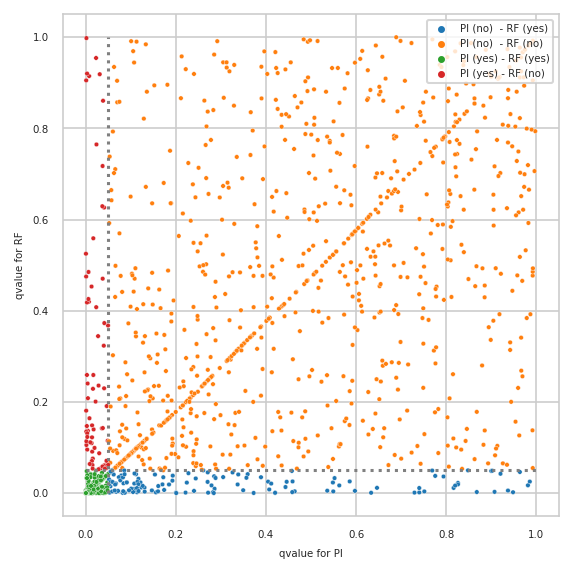

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_2_RF


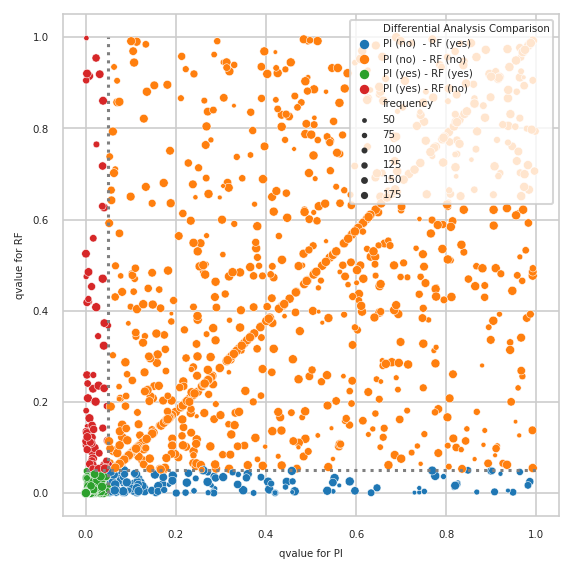

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out